In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = load_iris()

In [ ]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dataset.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

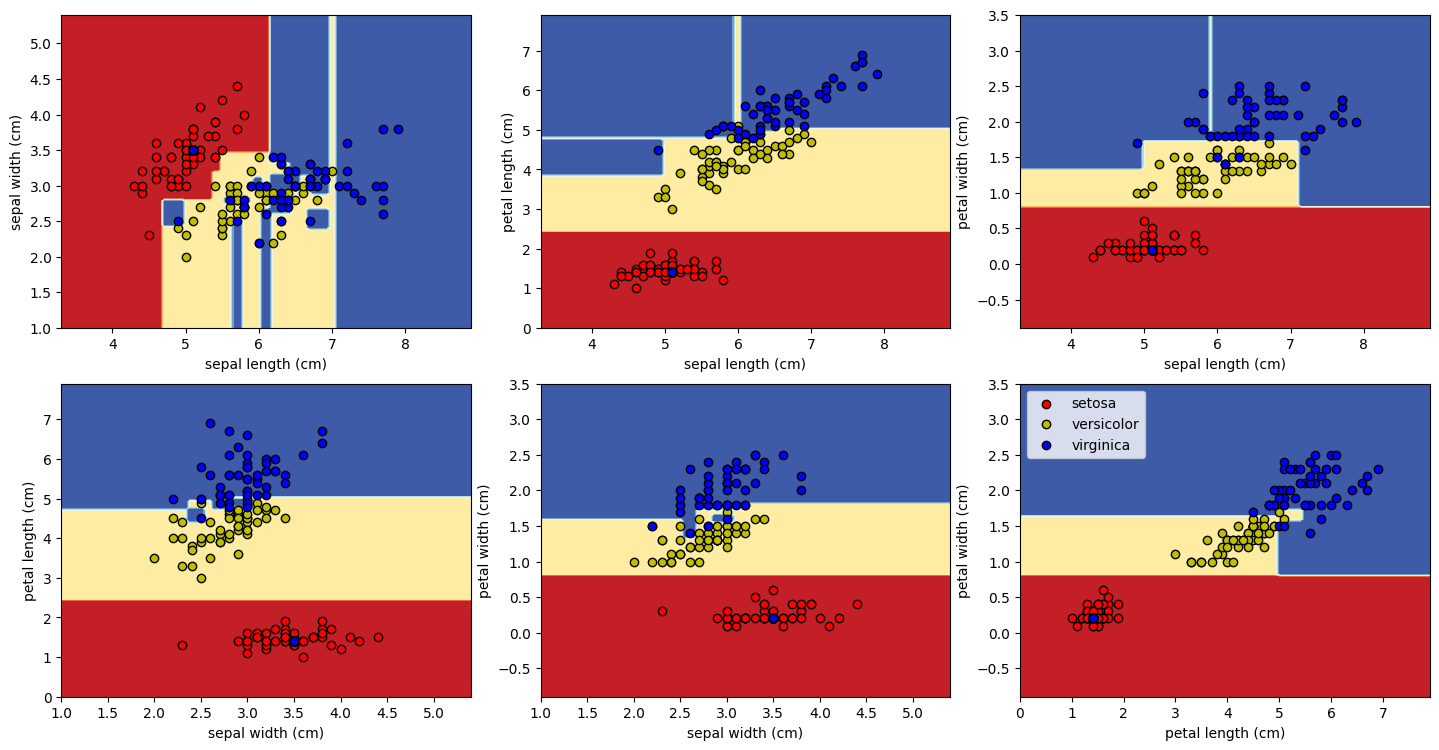

In [ ]:
plt.figure(figsize = (15,8))
n_classes = len(dataset.target_names)
plot_colors = "ryb"
for pairidx, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):
  X = dataset.data[:, pair] # [row, columns]
  y = dataset.target

  clf = DecisionTreeClassifier().fit(X, y)

  ax = plt.subplot(2, 3, pairidx+1)
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
  DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                         X = X,
                                         cmap = plt.cm.RdYlBu,
                                         response_method = "predict",
                                         ax = ax,
                                         xlabel = dataset.feature_names[pair[0]],
                                         ylabel = dataset.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where([y == i])
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = dataset.target_names[i], edgecolors = "black")
plt.legend()
